# Modeling how the probability reduces over time

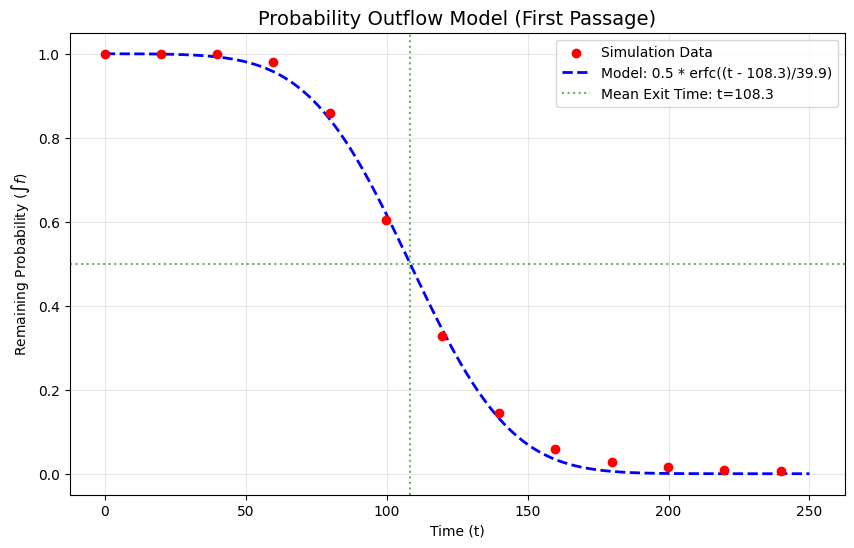

Model Results:
----------------
Mean Exit Time (t_exit): 108.3238
Spread Width (Diffusion): 39.8945
Fit Quality (R^2): 0.99881


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erfc

# --- 1. Your Data ---
t_data = np.array([0.0, 19.8, 39.8, 59.8, 79.8, 99.8, 119.8, 139.8, 159.8, 179.8, 199.8, 219.8, 239.8])
P_data = np.array([1.000000, 1.000000, 0.999536, 0.979810, 0.858462, 0.603528, 0.328552, 0.145223, 0.059860, 0.027386, 0.015215, 0.010037, 0.007436])

# --- 2. Define the Physical Model ---
# The remaining mass of a Gaussian drifting past a point is modeled by erfc.
# P(t) = 0.5 * erfc( (t - t_exit) / (width) )
# t_exit: The time when 50% of the mass has left (center of cloud hits boundary)
# width: Related to diffusion rate (how spread out the cloud is)

def outflow_model(t, t_exit, width):
    return 0.5 * erfc((t - t_exit) / width)

# --- 3. Fit the Model ---
# Initial guesses: Look at data. P=0.5 around t=105. Width appears to be about 40.
p0 = [105.0, 40.0] 

popt, pcov = curve_fit(outflow_model, t_data, P_data, p0=p0)
t_exit_fit, width_fit = popt

# --- 4. Plotting ---
t_smooth = np.linspace(0, 250, 500)
P_fit = outflow_model(t_smooth, t_exit_fit, width_fit)

plt.figure(figsize=(10, 6))
plt.scatter(t_data, P_data, color='red', label='Simulation Data', zorder=5)
plt.plot(t_smooth, P_fit, 'b--', linewidth=2, label=f'Model: 0.5 * erfc((t - {t_exit_fit:.1f})/{width_fit:.1f})')

# Mark the Mean Exit Time
plt.axvline(t_exit_fit, color='green', linestyle=':', alpha=0.6, label=f'Mean Exit Time: t={t_exit_fit:.1f}')
plt.axhline(0.5, color='green', linestyle=':', alpha=0.6)

plt.title('Probability Outflow Model (First Passage)', fontsize=14)
plt.xlabel('Time (t)')
plt.ylabel('Remaining Probability ($\int f$)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# --- 5. Analysis Output ---
print(f"Model Results:")
print(f"----------------")
print(f"Mean Exit Time (t_exit): {t_exit_fit:.4f}")
print(f"Spread Width (Diffusion): {width_fit:.4f}")
print(f"Fit Quality (R^2): {1 - np.sum((P_data - outflow_model(t_data, *popt))**2) / np.sum((P_data - np.mean(P_data))**2):.5f}")